In [297]:
import os
import glob

import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import imageio

## Solution 1

In [12]:
base = '/Users/romilrathi/Desktop/Q1/'
path = base+'*.csv'
files=glob.glob(path)

In [13]:
for file in files:
    population_data = pd.read_csv(file)
    
country_data = pd.read_csv("/Users/romilrathi/Desktop/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv")
continent_data = pd.read_csv("/Users/romilrathi/Desktop/ddf--gapminder--systema_globalis-master/ddf--entities--geo--world_4region.csv")

In [14]:
population_data.sample(5)

,geo,time,population_total
54718,twn,2037,24019489
14608,dom,1960,3294042
32248,lva,1841,717329
46139,sen,1886,1594074
54237,tuv,1857,3074


In [15]:
country_data.rename(columns={'country':'geo','name':'Country','world_4region':'continent'}, inplace=True)
country_mapping = country_data[['geo','Country', 'continent','latitude', 'longitude']]
country_mapping.sample(5)

continent_data.rename(columns={'world_4region':'continent', 'name_short':'Continent' }, inplace=True)
continent_data = continent_data[['continent', 'Continent']]

## Merging Continent and Country data
country_cont = pd.merge(country_mapping, continent_data, how='inner', on=['continent'])
country_cont = country_cont[['geo', 'Country', 'Continent', 'latitude', 'longitude']]
country_cont.sample(5)

,geo,Country,Continent,latitude,longitude
25,fin,Finland,Europe,64.00000,26.00000
250,nga,Nigeria,Africa,10.00000,8.00000
221,com,Comoros,Africa,-12.23333,44.44553
26,fra,France,Europe,46.00000,2.00000
69,tur,Turkey,Europe,39.00000,35.00000


In [16]:
population_continent = pd.merge(population_data, country_cont, how='inner', on='geo')
population_continent = population_continent[['time', 'Country', 'Continent','population_total','latitude', 'longitude']]

In [17]:
population_continent.sample(5)

,time,Country,Continent,population_total,latitude,longitude
17252,1895,Fiji,Asia,120628,-18.00,178.00000
14668,2020,Dominican Republic,America,11108358,19.00,-70.66667
53899,1820,Turkey,Europe,10118315,39.00,35.00000
37533,2009,Malawi,Africa,14714602,-13.50,34.00000
3912,2100,Belgium,Europe,13022033,50.75,4.50000


In [18]:
present_population = population_continent.loc[population_continent.time == 2019]
present_population.sample(5)

,time,Country,Continent,population_total,latitude,longitude
14667,2019,Dominican Republic,America,10996774,19.0,-70.66667
4132,2019,Benin,Africa,11801595,9.5,2.25000
31523,2019,Lesotho,Africa,2292682,-29.5,28.25000
42961,2019,Poland,Europe,38028278,52.0,20.00000
25503,2019,Israel,Asia,8583916,31.5,34.75000


In [22]:
adf = present_population.groupby('Continent').sum().reset_index()

In [310]:
colors = ['lightslategray',] * 5
colors[2] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=adf['Continent'],
    y=adf['population_total'],
    marker_color=colors
)])


fig.update_layout(title_text='Continent Population')
fig.write_image('/Users/romilrathi/Desktop/population_continent.png')
fig.show()

In [308]:
present_population = population_continent.loc[population_continent.time == 2019]
data = [ dict(
        type='choropleth',
        locations = present_population['Country'],
        z = present_population['population_total'],
        locationmode = 'country names',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)'
            )
        ),
        colorbar = dict(
            title = "Pppulation Size"
        )
    ) ]
fig = go.Figure(data=data)
fig.write_image('/Users/romilrathi/Desktop/population_countries.png')
fig.show()

In [25]:
#Population Density
pop_density = pd.read_csv('/Users/romilrathi/Desktop/ddf--datapoints--population_density_per_square_km--by--geo--time.csv')

In [26]:
pop_density = pd.merge(pop_density, country_cont, how='inner', on='geo')

In [309]:
colors = ['lightslategray',] * 5
colors[0] = 'crimson'

current_pop_density = pop_density.loc[pop_density.time == 2019]
pdf = current_pop_density.groupby('Continent').mean().reset_index()
fig = go.Figure(data=[go.Bar(
    x=pdf['Continent'],
    y=pdf['population_density_per_square_km'],
    marker_color=colors
)])

fig.write_image('/Users/romilrathi/Desktop/pop_density.png')
fig.update_layout(title_text='Continent Population Density')

### Problem 2

In [340]:
gdp_capita_data = pd.read_csv("/Users/romilrathi/Desktop/ddf--gapminder--systema_globalis-master/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")

In [341]:
gdp_capita_data.rename(columns={"gdppercapita_us_inflation_adjusted": "gdp_per_capita"}, inplace=True)
gdp_capita_data.sample(5)

,geo,time,gdp_per_capita
611,ben,1985,643.58748
1920,com,1982,908.37193
5216,mdg,1981,545.47201
561,bel,1993,33505.16550
2,afg,2003,376.75871


In [342]:
#Merging gdp data with country and continent information
gdp_country_continent = pd.merge(gdp_capita_data, country_cont, how='inner', on='geo')
gdp_country_continent= gdp_country_continent[['time', 'Country', 'gdp_per_capita', 'Continent','latitude', 'longitude']]

In [343]:
gdp_country_continent.sample(5)

,time,Country,gdp_per_capita,Continent,latitude,longitude
3046,1969,Georgia,2145.75223,Europe,41.99998,43.49990
8245,2016,Tanzania,867.05865,Africa,-6.00000,35.00000
8103,1990,Tunisia,2227.47056,Africa,34.00000,9.00000
7253,2000,Singapore,33390.05848,Asia,1.28967,103.85007
5390,2009,"Macedonia, FYR",4398.77380,Europe,41.66667,21.75000


In [344]:
#identifying % change in gdp per capita for each country and dropping the null values
data = []
for country in list(set(gdp_country_continent['Country'])):
    temp = gdp_country_continent.loc[gdp_country_continent.Country == country]
    temp['pct_gdp_change'] = temp['gdp_per_capita'].pct_change()
    data.append(temp)
    
df = pd.concat(data)
df.dropna(inplace=True)
df.sample(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,Country,gdp_per_capita,Continent,latitude,longitude,pct_gdp_change
553,1985,Belgium,28751.15910,Europe,50.75000,4.5000,0.016215
3125,1990,Ghana,823.59186,Africa,8.10000,-1.2000,0.005430
4593,1971,South Korea,1965.63873,Asia,36.50000,127.7500,0.082986
3079,2002,Georgia,1610.70725,Europe,41.99998,43.4999,0.061856
8659,2016,Vanuatu,2873.69294,Asia,-16.00000,167.0000,0.017702


In [329]:
for year in df['time'].unique():
    gdp_country_continent = df.loc[df.time == year]
    data = [ dict(
        type='choropleth',
        locations = gdp_country_continent['Country'],
        z = gdp_country_continent['gdp_per_capita'],
        locationmode = 'country names',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)'
            )
        ),
        colorbar = dict(
            title = "GDP Per Capita"
        )
    ) ]
    fig = go.Figure(data=data)
    fig.write_image('/Users/romilrathi/Desktop/plot/plot'+str(year)+'.png')

In [330]:
base = '/Users/romilrathi/Desktop/plot/'
path = base+'*.png'
files=glob.glob(path)

In [331]:
#reference to create gif from jpg: https://www.idiotinside.com/2017/06/06/create-gif-animation-with-python/
def gif(filenames, duration):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    output_file = 'Gdp_per_capita.gif' 
    imageio.mimsave(output_file, images, duration=duration)

In [332]:
gif(files, 2)

In [346]:
mean_gdp = gdp_country_continent.groupby(['time', 'Continent'])[['gdp_per_capita']].mean().reset_index()

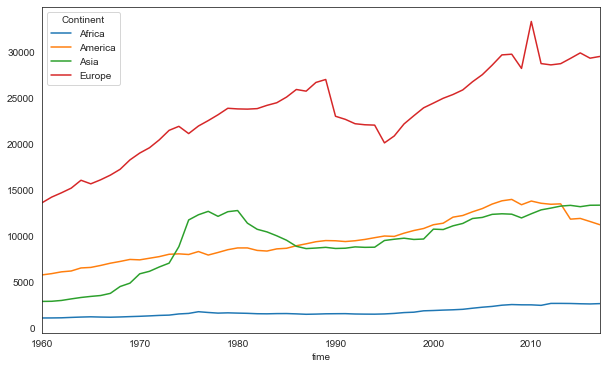

In [347]:
gdp_continent = pd.pivot_table(mean_gdp, index='time', values='gdp_per_capita', columns=['Continent'])
gdp_continent.plot(figsize=(10, 6))

## Solution 3

In [348]:
life_expectancy = pd.read_csv('/Users/romilrathi/Desktop/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [349]:
life_expectancy = pd.merge(life_expectancy, country_cont, how='inner', on='geo')
life_expectancy = life_expectancy[['time', 'Country', 'Continent','life_expectancy_years','latitude', 'longitude']]

In [350]:
life_gdp = pd.merge(life_expectancy, df, how='inner', on=['time','Country', 'latitude', 'longitude', 'Continent'])

In [351]:
life_gdp.sample(5)

,time,Country,Continent,life_expectancy_years,latitude,longitude,gdp_per_capita,pct_gdp_change
237,1994,Armenia,Europe,68.87,40.25000,45.00000,956.47089,0.079498
344,1990,Australia,Asia,77.04,-25.00000,135.00000,35896.80015,0.020431
6587,2001,Paraguay,America,74.35,-23.33333,-58.00000,2618.72528,-0.027402
7502,2006,Togo,Africa,56.99,8.66667,1.08333,482.85964,0.012982
6096,1992,Oman,Asia,71.70,21.00000,57.00000,15659.78021,0.035211


In [352]:
child_mortality = pd.read_csv('/Users/romilrathi/Desktop/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')

In [353]:
child_mortality = pd.merge(child_mortality, country_cont, how='inner', on='geo')
child_mortality = child_mortality[['time', 'Country', 'Continent','child_mortality_0_5_year_olds_dying_per_1000_born','latitude', 'longitude']]

In [354]:
child_mortality.sample(5)

,time,Country,Continent,child_mortality_0_5_year_olds_dying_per_1000_born,latitude,longitude
24079,1881,Mexico,America,487.150,19.42847,-99.12766
34182,1897,Serbia,Europe,271.620,44.81892,20.45998
7833,2017,"Congo, Dem. Rep.",Africa,92.462,-2.50000,23.50000
6691,1970,Switzerland,Europe,18.400,47.00016,8.01427
10027,1957,Djibouti,Africa,263.254,11.58901,43.14503


In [355]:
life_gdp_mortality = pd.merge(life_gdp, child_mortality, how='inner', on=['time','Country', 'latitude', 'longitude', 'Continent'])

In [356]:
life_gdp_mortality

,time,Country,Continent,life_expectancy_years,latitude,longitude,gdp_per_capita,pct_gdp_change,child_mortality_0_5_year_olds_dying_per_1000_born
0,2003,Afghanistan,Asia,53.03,33.0,66.00,376.75871,0.033431,118.300
1,2004,Afghanistan,Asia,53.50,33.0,66.00,364.09544,-0.033611,114.400
2,2005,Afghanistan,Asia,53.87,33.0,66.00,389.41636,0.069545,110.300
3,2006,Afghanistan,Asia,54.15,33.0,66.00,397.98590,0.022006,106.300
4,2007,Afghanistan,Asia,54.57,33.0,66.00,440.36816,0.106492,102.200
...,...,...,...,...,...,...,...,...,...
8383,2013,Zimbabwe,Africa,55.59,-19.0,29.75,942.03866,0.031206,70.000
8384,2014,Zimbabwe,Africa,56.99,-19.0,29.75,939.78027,-0.002397,64.300
8385,2015,Zimbabwe,Africa,58.27,-19.0,29.75,933.50327,-0.006679,59.900
8386,2016,Zimbabwe,Africa,59.27,-19.0,29.75,917.56372,-0.017075,56.400


In [357]:
mean_data = life_gdp_mortality.groupby(['Continent', 'time'])['life_expectancy_years', 'gdp_per_capita', 'child_mortality_0_5_year_olds_dying_per_1000_born'].mean().reset_index()

In [358]:
overall_mean_data = mean_data.groupby(['time'])['life_expectancy_years', 'gdp_per_capita', 'child_mortality_0_5_year_olds_dying_per_1000_born'].mean().reset_index()

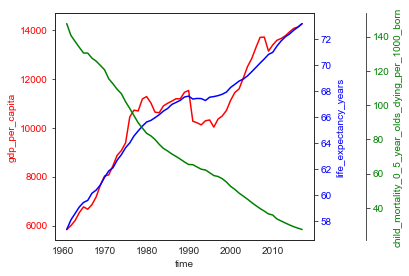

In [359]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
color = 'red'
ax1.set_ylabel('gdp_per_capita', color = color)
ax1.plot(overall_mean_data['time'], overall_mean_data['gdp_per_capita'], color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('life_expectancy_years', color=color)
ax2.plot(overall_mean_data['time'], overall_mean_data['life_expectancy_years'], color = color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
color = 'green'
ax3.set_ylabel('child_mortality_0_5_year_olds_dying_per_1000_born', color=color)
ax3.plot(overall_mean_data['time'], overall_mean_data['child_mortality_0_5_year_olds_dying_per_1000_born'], color = color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

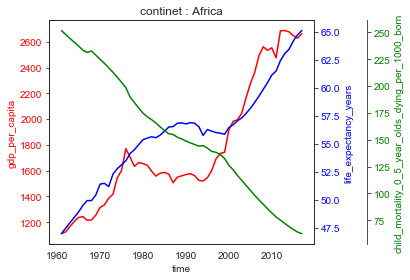

<Figure size 432x288 with 0 Axes>

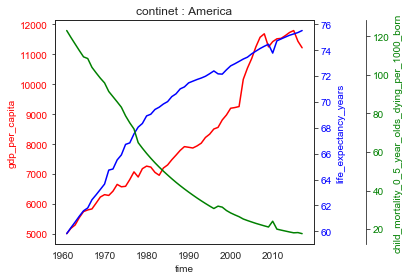

<Figure size 432x288 with 0 Axes>

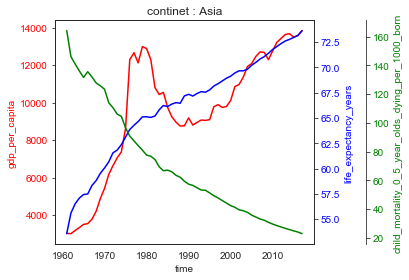

<Figure size 432x288 with 0 Axes>

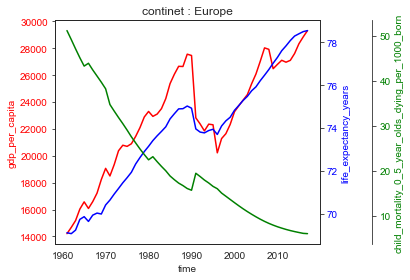

<Figure size 432x288 with 0 Axes>

In [322]:
for continent in mean_data['Continent'].unique():
    data = mean_data.loc[mean_data['Continent'] == continent ]
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('time')
    color = 'red'
    ax1.set_ylabel('gdp_per_capita', color = color)
    ax1.plot(data['time'], data['gdp_per_capita'], color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'blue'
    ax2.set_ylabel('life_expectancy_years', color=color)
    ax2.plot(data['time'], data['life_expectancy_years'], color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.2))
    color = 'green'
    ax3.set_ylabel('child_mortality_0_5_year_olds_dying_per_1000_born', color=color)
    ax3.plot(data['time'], data['child_mortality_0_5_year_olds_dying_per_1000_born'], color = color)
    ax3.tick_params(axis='y', labelcolor=color)
    
    plt.title('continet : ' + continent)
    fig.tight_layout()  
    plt.show()


## Solution 4

In [125]:
co2_emission = pd.read_csv('/Users/romilrathi/Desktop/ddf--datapoints--yearly_co2_emissions_1000_tonnes--by--geo--time.csv')

In [126]:
emission = pd.merge(co2_emission, country_cont, how='inner', on='geo')
emission = emission[['time', 'Country', 'Continent','yearly_co2_emissions_1000_tonnes','latitude', 'longitude']]

In [127]:
emission.dropna(inplace=True)
emission.sample(5)

,time,Country,Continent,yearly_co2_emissions_1000_tonnes,latitude,longitude
786,1914,Australia,Asia,24499.227,-25.00000,135.00000
9143,2001,Jamaica,America,10615.965,18.16667,-77.25000
4015,1958,Cape Verde,Africa,14.668,16.00000,-24.00000
2497,1956,Barbados,America,128.345,13.16667,-59.53333
8654,1984,Iran,Asia,150658.695,32.00000,53.00000


In [265]:
emission_gdp = pd.merge(emission, df, how='inner', on=['time','Country', 'latitude', 'longitude', 'Continent'])

In [237]:
emission_continents = emission.groupby(['time','Continent'])[['yearly_co2_emissions_1000_tonnes']].mean().reset_index()

In [266]:
emission_gdp

,time,Country,Continent,yearly_co2_emissions_1000_tonnes,latitude,longitude,gdp_per_capita,pct_gdp_change
0,2003,Afghanistan,Asia,1195.442,33.0,66.00,376.75871,0.033431
1,2004,Afghanistan,Asia,949.753,33.0,66.00,364.09544,-0.033611
2,2005,Afghanistan,Asia,1327.454,33.0,66.00,389.41636,0.069545
3,2006,Afghanistan,Asia,1650.150,33.0,66.00,397.98590,0.022006
4,2007,Afghanistan,Asia,2273.540,33.0,66.00,440.36816,0.106492
...,...,...,...,...,...,...,...,...
7842,2010,Zimbabwe,Africa,7777.707,-19.0,29.75,719.97952,0.103774
7843,2011,Zimbabwe,Africa,9563.536,-19.0,29.75,813.83401,0.130357
7844,2012,Zimbabwe,Africa,7792.375,-19.0,29.75,913.53063,0.122502
7845,2013,Zimbabwe,Africa,11675.728,-19.0,29.75,942.03866,0.031206


In [271]:
emission_gdp = emission_gdp.groupby(['time','Continent'])[['yearly_co2_emissions_1000_tonnes', 'gdp_per_capita']].mean().reset_index()

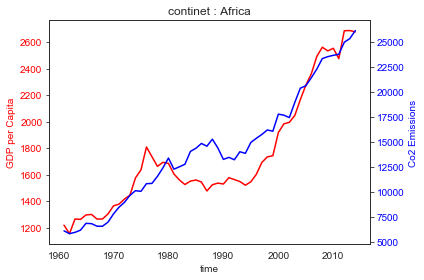

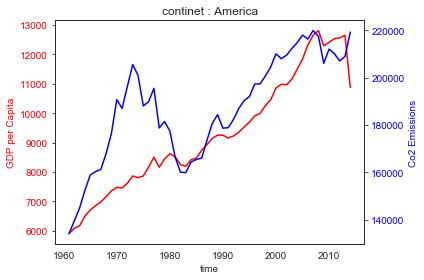

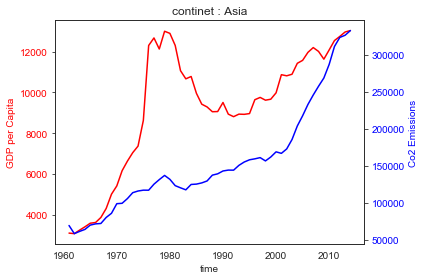

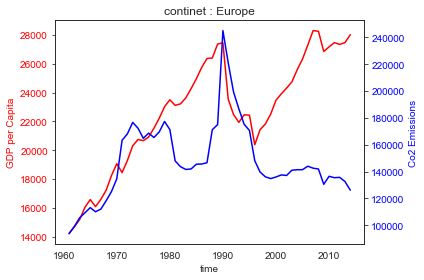

In [272]:
for continent in emission_gdp['Continent'].unique():
    data = emission_gdp.loc[emission_gdp['Continent'] == continent ]
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('time')
    color = 'red'
    ax1.set_ylabel('GDP per Capita', color = color)
    ax1.plot(data['time'], data['gdp_per_capita'], color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'blue'
    ax2.set_ylabel('Co2 Emissions', color = color)
    ax2.plot(data['time'], data['yearly_co2_emissions_1000_tonnes'], color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('continet : ' + continent)
    fig.tight_layout()  
    plt.show()